**непараметрическая регрессия**

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

In [2]:
# загружаем даные
#data = np.loadtxt('../data/1000f/points.txt')
data = np.loadtxt('../data/1000b/points.txt')
# data = np.loadtxt('../data/1000_1_sin/points.txt')

In [3]:
# print( data.shape )
# print( data.min(axis=0) )
# print( data.max(axis=0) )

In [4]:
X = data[:,0:-1] # признаки
y = data[:,-1] # ответ
X.shape,y.shape

((1000, 1), (1000,))

---

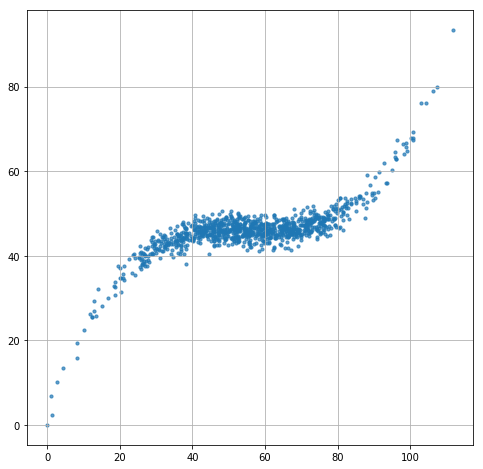

In [5]:
# рисуем исходные данные
plt.figure(figsize=(8,8)) # размер картинки
plt.scatter( x=X, y=y, s=10, alpha=0.7 ) # точки учебного набора
plt.grid()
# plt.savefig('1.png')
plt.show()


---

непараметрическая регрессия, формула Надарая-Ватсона

$$ 
a(x,X,y) = \frac 
 { \sum\limits_{i=1}^m y_i K\left(\frac{\rho(x,x_i)}{h}\right) }
 { \sum\limits_{i=1}^m K\left(\frac{\rho(x,x_i)}{h}\right) } 
$$

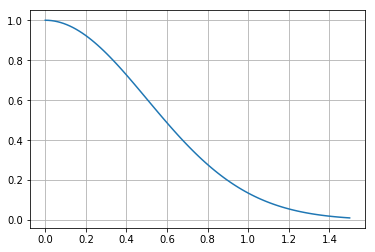

In [12]:
# # прямоугольное ядро
# def K(x): return np.abs(x)<=1.0

# # треугольное ядро
# def K(x): return (1.0-np.abs(x))*(np.abs(x)<=1.0)

# квадратичное ядро (Епанечникова)
#def K(x): return (1.0-np.square(x))*(np.abs(x)<=1.0)
    
# гауссово ядро
def K(x): return np.exp(-2.0*np.square(x))


x = np.linspace(0.0,1.5,100)
plt.plot(x,K(x))
plt.grid()
plt.show()

---

In [13]:
# точки, для которых будем считать регрессию
n=X.shape[0]//10 # количество
u=np.linspace(X.min(),X.max(),n).reshape(-1,1)

---

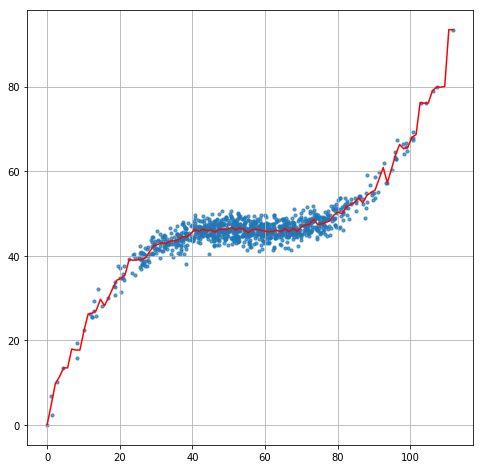

In [14]:
from sklearn.metrics import pairwise_distances

r=pairwise_distances(u,X,metric='euclidean') 
#r/=r.max() #нормируем матрицу расстояний

h = .7 # ширина окна, влияет на точность аппроксимации
w = K(r/h) # влияет на на гладкость аппроксимации
z = (y*w).sum(axis=1)/w.sum(axis=1)

# рисуем исходные данные
plt.figure(figsize=(8,8)) # размер картинки
plt.scatter(x=X,y=y,s=10,alpha=0.7) # точки учебного набора
plt.plot(u,z,c='r') # точки учебного набора
plt.grid()
plt.show()